In [33]:
# write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [3]:
gp = pd.read_csv('googleplaystore.csv')
gp.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
gp['Price'].isnull().sum()

0

In [5]:
gp.shape

(10841, 13)

In [6]:
gp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
free= gp['Type'].fillna('free',inplace=True)
gp['Content Rating'].fillna('Everyone',inplace=True)
gp['Current Ver'].fillna('1.0',inplace=True)
gp['Android Ver'].fillna('2.2 And up ', inplace=True)
gp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

**1. What is the download rate by categories?**

In [10]:
gp.Installs[0] 

'10,000+'

In [11]:
gp['Installs']= gp['Installs'].str.replace(',','')
gp['Installs']= gp['Installs'].str.replace('+','')
gp['Installs']= gp['Installs'].str.replace('Free','0')

In [12]:
gp['Installs']= pd.to_numeric(gp['Installs'])

gp['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: int64

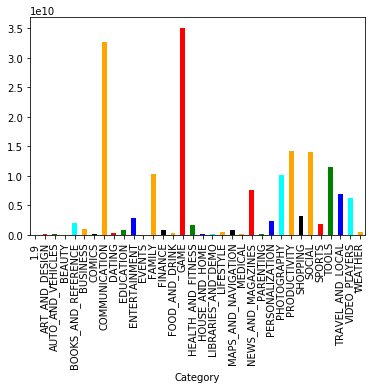

In [13]:
gp.groupby('Category')['Installs'].sum().plot.bar(x='Category',y='Installs',color=['orange', 'red', 'green', 'blue', 'cyan','orange','black'])

**2. What is the name of the 15 most downloaded applications?**

In [14]:

A=gp.groupby('App')['Installs'].sum()
A.sort_values(ascending=False).head(15)


App
Subway Surfers                              6000000000
Instagram                                   4000000000
Google Drive                                4000000000
Hangouts                                    4000000000
Google Photos                               4000000000
Google News                                 4000000000
Candy Crush Saga                            3500000000
Google Chrome: Fast & Secure                3000000000
Skype - free IM & video calls               3000000000
Maps - Navigate & Explore                   3000000000
Gmail                                       3000000000
WhatsApp Messenger                          3000000000
Messenger – Text and Video Chat for Free    3000000000
Temple Run 2                                3000000000
Viber Messenger                             2500000000
Name: Installs, dtype: int64

**3. What is the download rate for paid applications?**

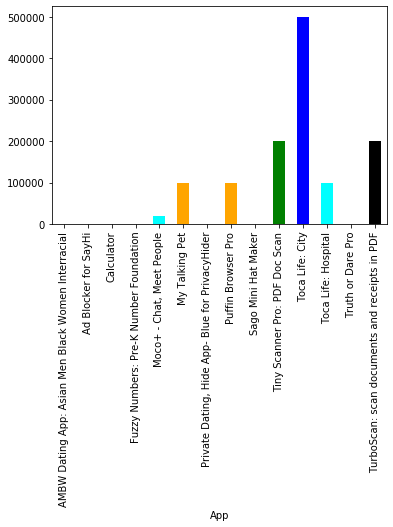

In [15]:
gp[gp['Type']=='Paid'].head(17).groupby('App')['Installs'].sum().plot.bar(x='App',y='Category',color=['orange', 'red', 'green', 'blue', 'cyan','orange','black'])

**4. Sort by category.**

In [16]:
gp.sort_values(by=['Category'], inplace=True) # dataframe sorting 

In [17]:
gp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,2.2 And up
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,100000,Free,0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,500000,Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up


**5. What is the download rate and user rating by category?**

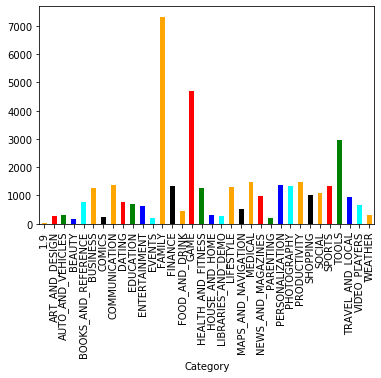

In [18]:
bar=gp.groupby('Category')['Rating'].sum()
bar.head(35).plot.bar(x='Category',y='Rating',color=['orange', 'red', 'green', 'blue', 'cyan','orange','black'])


In [23]:
# for dummy variable encoding for Categories
x = gp.drop(['Installs'], axis=1)

In [24]:
x.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,2.2 And up
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,Free,0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up


In [25]:
y = gp['Installs']

y.head()

10472          0
0          10000
35        100000
36        500000
37       5000000
Name: Installs, dtype: int64

**6. Apply Machine learning models?**

In [26]:
# train and test split

from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [28]:
x_train


,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
505,Cougar Dating Life : Date Older Women Sugar Mummy,DATING,3.9,1643,31M,Free,0,Mature 17+,Dating,"July 3, 2018",4.5.5,4.1 and up
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11M,Free,0,Everyone,Art & Design,"November 29, 2017",1.3,4.0.3 and up
594,FERZU - Furries Social Network,DATING,3.9,1576,Varies with device,Free,0,Mature 17+,Dating,"February 16, 2018",4.4.1,4.1 and up
2607,YouNow: Live Stream Video Chat,SOCIAL,4.1,309872,85M,Free,0,Teen,Social,"August 3, 2018",14.0.13,4.1 and up
5282,AK-47 Assault Rifle,FAMILY,3.7,165,25M,Free,0,Teen,Entertainment,"April 26, 2015",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Safe Wi-Fi,PRODUCTIVITY,2.9,32,9.7M,Free,0,Everyone,Productivity,"August 3, 2018",1.3.22,4.4 and up
9808,HTC Sense Input - ES,TOOLS,4.3,3509,6.5M,Free,0,Everyone,Tools,"October 30, 2015",1.0.612919,5.0 and up
9129,DZ Fly Algérie Horaire Vols,TRAVEL_AND_LOCAL,3.6,114,10M,Free,0,Everyone,Travel & Local,"October 31, 2016",2.0,4.0 and up
6871,van Gennip Textiles BV,LIFESTYLE,NaN,1,4.0M,Free,0,Everyone,Lifestyle,"June 28, 2018",1.1.5,4.1 and up


In [29]:
x_test

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8832,NDS-controller,TOOLS,3.3,35,916k,Free,0,Everyone,Tools,"October 23, 2017",0.2,2.2 and up
794,Brilliant,EDUCATION,4.5,41185,Varies with device,Free,0,Everyone,Education,"August 3, 2018",Varies with device,Varies with device
9221,"Call Blocker - Blacklist, SMS Blocker",COMMUNICATION,4.2,30350,3.7M,Free,0,Everyone,Communication,"January 16, 2018",10.0.0,4.1 and up
4524,Q Quiz SK,FAMILY,3.9,159,39M,Free,0,Everyone,Education,"December 8, 2015",2.3,2.3 and up
2183,Sago Mini Friends,FAMILY,4.4,13155,83M,Free,0,Everyone,Education;Pretend Play,"June 16, 2016",1.3,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10418,FH Dortmund FB4,FAMILY,NaN,40,9.9M,Free,0,Everyone,Education,"May 22, 2018",1.2.0,4.0.3 and up
4929,AC Remote Control Simulator,FAMILY,3.3,353,2.3M,Free,0,Everyone,Entertainment,"December 4, 2017",1.0,4.0.3 and up
4665,SAY-U,FAMILY,3.2,1011,Varies with device,Free,0,Teen,Entertainment,"July 13, 2018",Varies with device,4.1 and up
3932,AutoCAD - DWG Viewer & Editor,PRODUCTIVITY,4.2,145088,24M,Free,0,Everyone,Productivity,"July 23, 2018",4.5.19,4.4 and up


In [30]:
y_train

505        500000
38          10000
594         10000
2607     10000000
5282        10000
           ...   
10454        1000
9808      1000000
9129        10000
6871          100
2430           50
Name: Installs, Length: 8130, dtype: int64

In [31]:
y_test

8832         1000
794       1000000
9221      1000000
4524         5000
2183      1000000
           ...   
10418        1000
4929       100000
4665       100000
3932     10000000
5389     10000000
Name: Installs, Length: 2711, dtype: int64